In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

In [ ]:
!pip install keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#choose to run with colab, run the following code in advance
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


**ref:**

https://medium.com/@muhammetbolat/supervised-unsupervised-techniques-on-mnist-dataset-3f2ffd4c41c5

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [13]:
def get_detaset():
    train_df = pd.read_csv('classification-of-mnist-digits/train.csv')
    train = train_df.to_numpy()
    test_df = pd.read_csv('classification-of-mnist-digits/test.csv')
    test = test_df.to_numpy()
    train_result_df = pd.read_csv('classification-of-mnist-digits/train_result.csv')
    train_result = train_result_df.to_numpy()
    return train, test, train_result

def split_testset(data):
    data = np.delete(data, -1, axis=1)
    #z-score standardization
    standardize_data = (data-np.mean(data, axis=1)[:,np.newaxis])/np.std(data, axis=1)[:,np.newaxis]
    return standardize_data

def treat_dataset(data, data_result):
    data = np.delete(data, -1, axis=1)
    #z-score standardization
    standardize_data = (data-np.mean(data, axis=1)[:,np.newaxis])/np.std(data, axis=1)[:,np.newaxis]
    data_result = np.delete(data_result, 0, axis=1)
    indexes = np.arange(standardize_data.shape[0])
    train_indexes = np.concatenate((indexes[indexes%5 == 0],indexes[indexes%5 == 1],indexes[indexes%5 == 2],indexes[indexes%5 == 3]),axis=0)
    test_indexes = indexes[indexes%5==4]
    return standardize_data[train_indexes,:],standardize_data[test_indexes,:],data_result[train_indexes,:].flatten(),data_result[test_indexes,:].flatten()

In [ ]:
train, test, train_result = get_detaset()
test_data = split_testset(test)
X_train, X_valid, y_train, y_valid = treat_dataset(train, train_result)
training_dataset_x = X_train.reshape(-1, 28 * 56) 
test_dataset_x = X_valid.reshape(-1, 28 * 56)
test_features = test_data.reshape(-1, 28 * 56)
training_dataset_y = to_categorical(y_train)
test_dataset_y = to_categorical(y_valid)

ANN model and training

In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=28 * 56, activation='relu', name='Hidden-1'))
model.add(Dense(256, activation='relu', name='Hidden-2'))
model.add(Dense(128, activation='relu', name='Hidden-3'))
model.add(Dense(19, activation='softmax', name='Output'))

In [ ]:
EPOCHS = 5
BATCH_SIZE = 64
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time hist = model.fit(training_dataset_x, training_dataset_y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 7s 11ms/step - loss: 1.5363 - accuracy: 0.5019 - val_loss: 0.9232 - val_accuracy: 0.7110
Epoch 2/5
500/500 [==============================] - 5s 10ms/step - loss: 0.6547 - accuracy: 0.7979 - val_loss: 0.5996 - val_accuracy: 0.8214
Epoch 3/5
500/500 [==============================] - 6s 12ms/step - loss: 0.4243 - accuracy: 0.8699 - val_loss: 0.5236 - val_accuracy: 0.8478
Epoch 4/5
500/500 [==============================] - 5s 11ms/step - loss: 0.2958 - accuracy: 0.9092 - val_loss: 0.5173 - val_accuracy: 0.8510
Epoch 5/5
500/500 [==============================] - 5s 10ms/step - loss: 0.2253 - accuracy: 0.9282 - val_loss: 0.4844 - val_accuracy: 0.8673
CPU times: user 40.8 s, sys: 2.19 s, total: 43 s
Wall time: 28.8 s


In [ ]:
loss, accuracy = model.evaluate(test_dataset_x, test_dataset_y)
print('loss = {}, accuracy = {}'.format(loss, accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.8660
loss = 0.5107966065406799, accuracy = 0.8659999966621399


In [ ]:
pred = model.predict(test_features)
df_submit = np.argmax(pred, axis = 1)
df_submit = pd.DataFrame(df_submit, columns = ['Class'])
# submission
df_submit=df_submit.reset_index()
df_submit.rename(columns = {'index':'Index'}, inplace = True)
df_submit.to_csv('./ANN.csv', index = False)

313/313 [==============================] - 1s 3ms/step


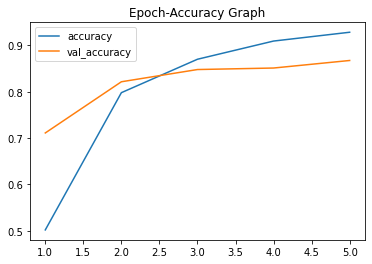

In [ ]:
plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(hist.epoch) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.epoch) + 1), hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
model.save('ANN.h5')

In [ ]:
model = load_model('ANN.h5')